In [11]:
# from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py

In [10]:
import chart_studio
chart_studio.tools.set_credentials_file(username='chrimerss', api_key='Vat4JLC614ohsoUTgfqp')

In [2]:
from glob import glob

In [80]:
!ls data/bias_corrected

pr__AWI_ssp126_bias_corrected.nc
pr__AWI_ssp585_bias_corrected.nc
pr__BCC_ssp126_bias_corrected.nc
pr__BCC_ssp585_bias_corrected.nc
pr__CAMS_ssp126_bias_corrected.nc
pr__CAMS_ssp585_bias_corrected.nc
pr__CCCR-IITM_ssp126_bias_corrected.nc
pr__CCCR-IITM_ssp585_bias_corrected.nc
pr__CCCma_ssp126_bias_corrected.nc
pr__CCCma_ssp585_bias_corrected.nc
pr__CMCC_ssp126_bias_corrected.nc
pr__CMCC_ssp585_bias_corrected.nc
pr__CNRM-CERFACS_ssp126_bias_corrected.nc
pr__CNRM-CERFACS_ssp585_bias_corrected.nc
pr__CSIRO-ARCCSS_ssp126_bias_corrected.nc
pr__CSIRO-ARCCSS_ssp585_bias_corrected.nc
pr__CSIRO_ssp126_bias_corrected.nc
pr__CSIRO_ssp585_bias_corrected.nc
pr__EC-Earth-Consortium_ssp126_bias_corrected.nc
pr__EC-Earth-Consortium_ssp585_bias_corrected.nc
pr__INM_ssp126_bias_corrected.nc
pr__INM_ssp585_bias_corrected.nc
pr__IPSL_ssp126_bias_corrected.nc
pr__IPSL_ssp585_bias_corrected.nc
pr__KIOST_ssp126_bias_corrected.nc
pr__KIOST_ssp585_bias_corrected.nc
pr__MIROC_ssp126_bias_corrected.nc
pr__MIROC

In [3]:
nc_files= glob('bias_corrected/pr*_ssp585_bias_corrected.nc')

In [5]:
df= pd.DataFrame(index= pd.date_range('2000-01-01 00:00:00', '2098-12-31 00:00:00', freq='D'))

In [6]:
for nc in nc_files:
    model= nc.split('__')[1].split('_')[0]
    ds= xr.open_dataset(nc).to_array()
    df.loc[ds.time.values, model]= ds.values.squeeze()

In [49]:
df[~pd.isna(df.NUIST)].resample('Y').sum().to_csv('pr_models_ssp585.csv')

In [42]:
from ipywidgets import widgets

In [113]:
list_figs= []
counter=0
for scenario in ['126', '585']:
    if scenario == '126': visible=True
    else: visible=False
    nc_files= sorted(glob('data/bias_corrected/tasmax*_ssp%s_bias_corrected.nc'%scenario))
    df= pd.DataFrame(index= pd.date_range('2000-01-01 00:00:00', '2098-12-31 00:00:00', freq='D'))
    for nc in nc_files:
        model= nc.split('__')[1].split('_')[0]
        ds= xr.open_dataset(nc).to_array()
        df.loc[ds.time.values, model]= ds.values.squeeze()
    df_year= df[~pd.isna(df.NUIST)].resample('Y').mean()
    list_figs.append(
    go.Scatter(
        x=df_year.index.tolist()+df_year.index[::-1].tolist(), # x, then x reversed
        y=df_year.max(axis=1).tolist()+df_year.min(axis=1).tolist()[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.1)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False,
        name='Range',
        visible=visible
    )    
    )
    counter+=1
    for col in df_year.columns:
        list_figs.append(go.Scatter(x=df_year.index, y=df_year[col], mode='lines', line=dict(color='rgba(209,204,188,0.8)'), name=col,visible=visible))
        counter+=1
    list_figs.append(    go.Scatter(
            x=df_year.index,
            y=df_year.mean(axis=1),
            line=dict(color='rgb(0,0,0)'),
            mode='lines',
            name='Ensemble mean',
        visible=visible
        ))
    counter+=1
    print(counter)
    

20
40


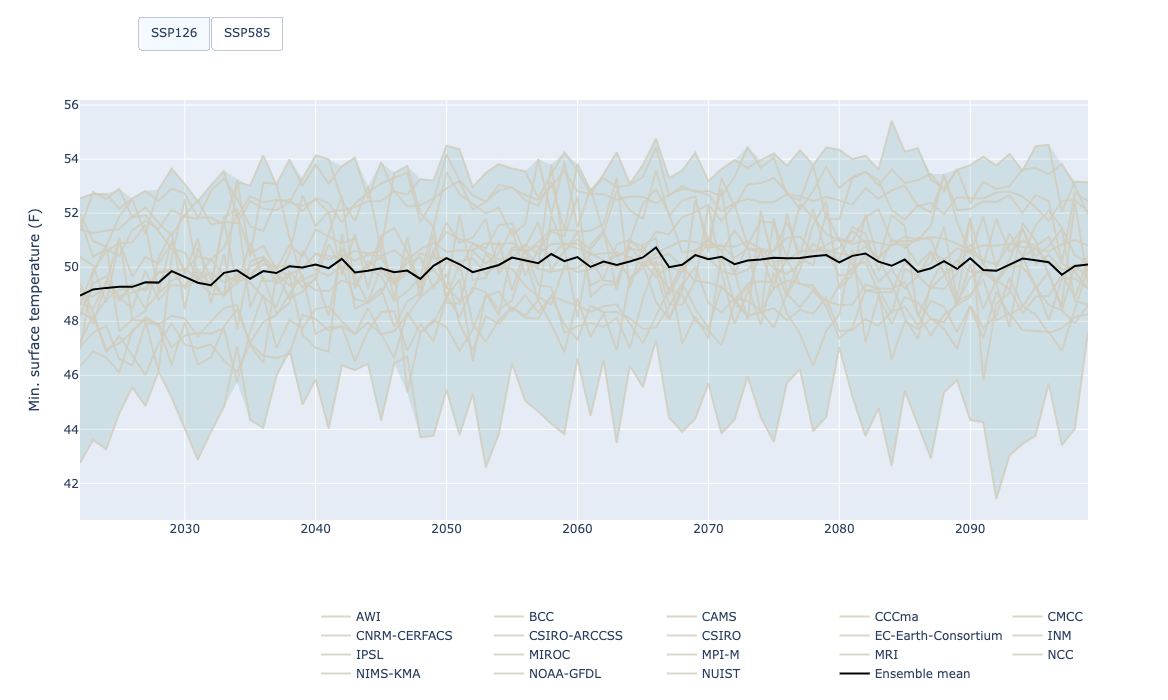

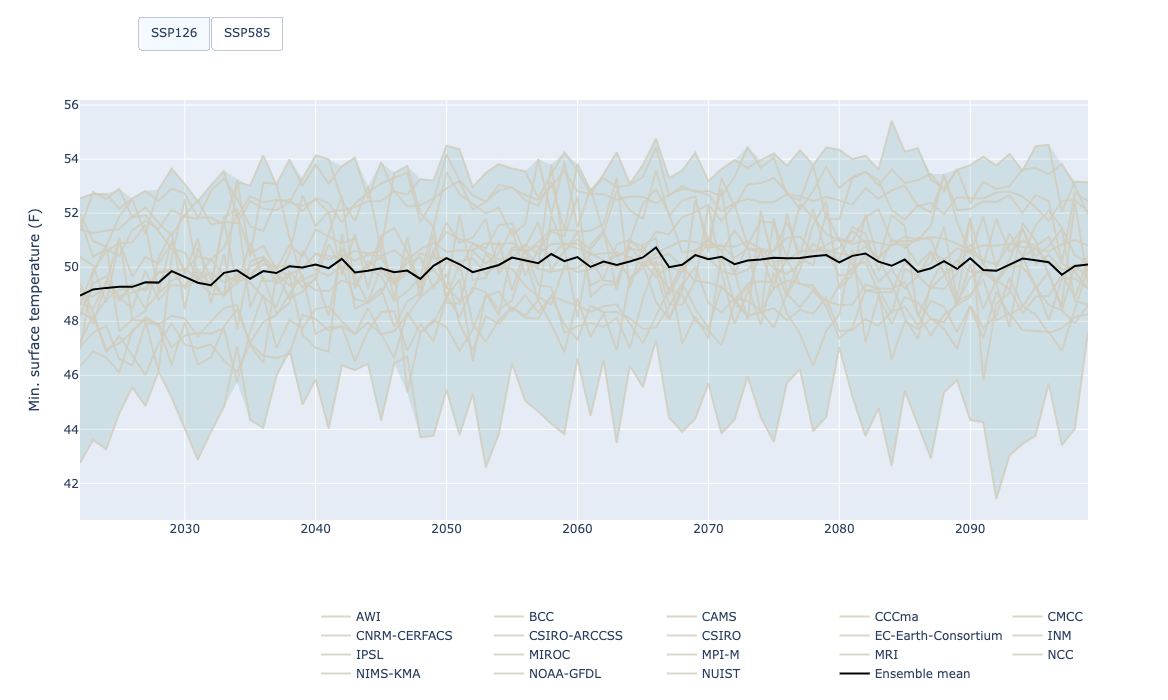

In [114]:
fig= go.Figure(list_figs, dict(width=900, height=700))

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.4,
    xanchor="right",
    x=1),
    yaxis_title= 'Min. surface temperature (F)',
    updatemenus = [
      go.layout.Updatemenu(
         type = "buttons", direction = "right", active = 0, x = 0.2, y = 1.2,
         buttons = list(
            [
               dict(
                  label = "SSP126", method = "update",
                  args = [{"visible": [True]*(len(list_figs)//2)+[False]*(len(list_figs)//2)}]
               ),
               dict(
                  label = "SSP585", method = "update", 
                  args = [{"visible": [False]*(len(list_figs)//2)+[True]*(len(list_figs)//2)}]
               )
            ]
         )
      )
   ])
fig.show()

In [115]:
py.iplot(fig, filename='tasmin', auto_open=True)